In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import the datasets
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
#description of dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [ ]:
#to counts row of gender
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
#categorical data
df_cat=df.select_dtypes(object)

In [ ]:
#create a object of class LabelEncoder
le=LabelEncoder()

In [ ]:
#convert Gender colummn datatype object to int
df['Gender']=le.fit_transform(df_cat["Gender"])

In [ ]:
#check null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

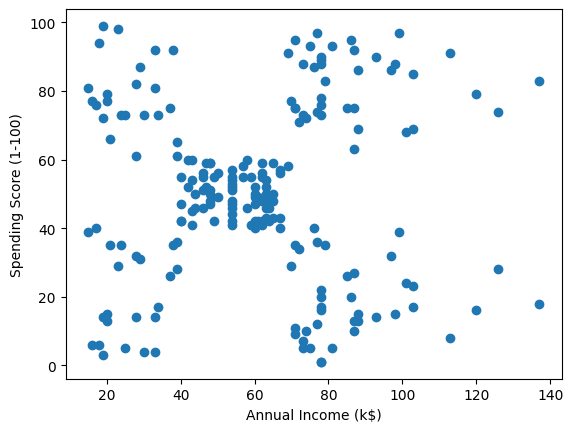

In [ ]:
#plot the scatterplot of Annual Income and Spending Score
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

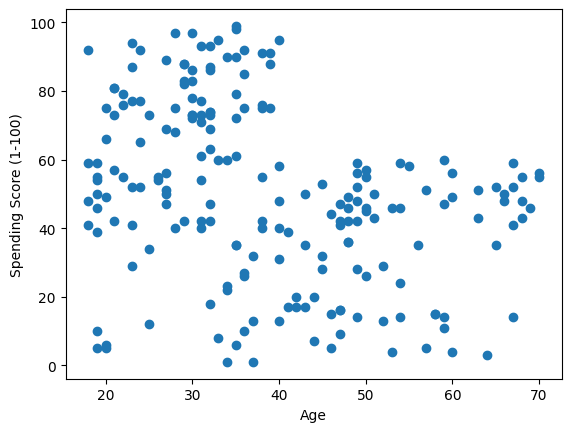

In [ ]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

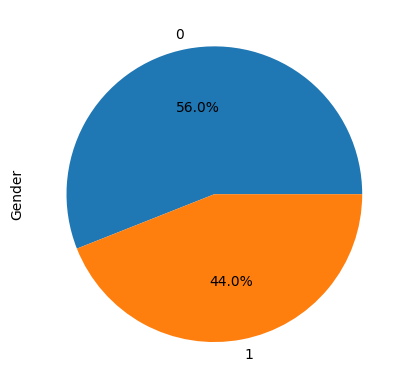

In [ ]:
#0=female and 1=male
df["Gender"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

<ipython-input-19-2ef86b328cca>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-19-2ef86b328cca>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-19-2ef86b328cca>:8: UserWarning: 

`distplot` is a deprecated function and will b

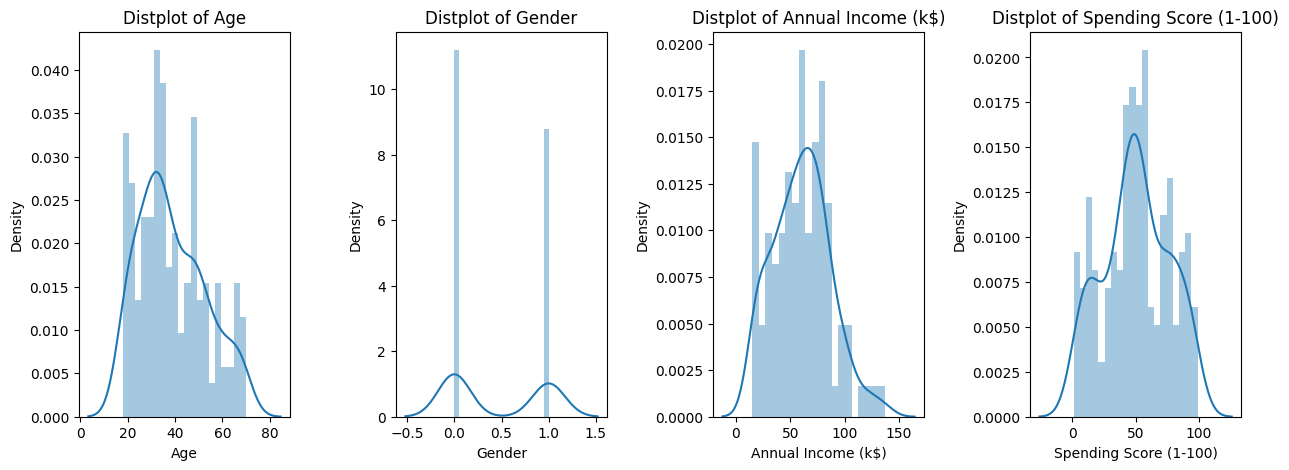

In [ ]:
# plot the distplot of all columns
plt.figure( figsize = (15 , 5))
n = 0
for x in ['Age' ,'Gender','Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']=scaler.transform(df[['Annual Income (k$)']])


In [ ]:
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.008197,0.051020
3,4,0,23,0.008197,0.775510
4,5,0,31,0.016393,0.397959


In [ ]:
X= df.iloc[:, [3,4]].values

# **Elbow method**

In [ ]:
#Elbow method is used to find the number of clusters before making data
#sum of squared error(SSE)
sse=[] #blank array for SSE
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

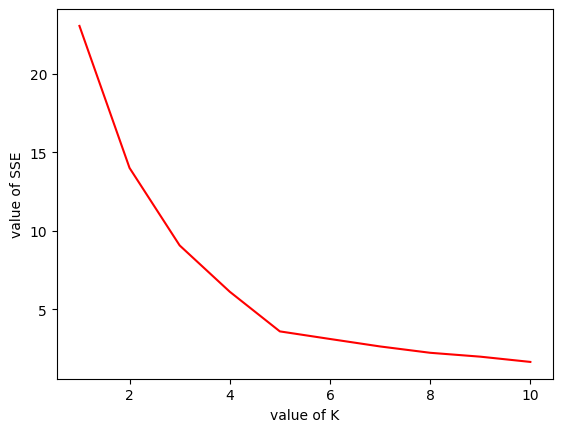

In [ ]:
#we plot 2D graph
plt.xlabel('value of K')
plt.ylabel('value of SSE')
plt.plot(k_rng,sse,color="red")
plt.show()

In [ ]:
#last elbow comes at 5 so we take k=5
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
#predict the model
y_kmeans= kmeansmodel.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
#to show centeroid of all clusters
kmeansmodel.cluster_centers_

array([[0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

In [ ]:
#create 5 dataframe according to clusters
dfx1=X[y_kmeans == 0, 0]
dfx2=X[y_kmeans == 1, 0]
dfx3=X[y_kmeans == 2, 0]
dfx4=X[y_kmeans == 3, 0]
dfx5=X[y_kmeans == 4, 0]


dfy1=X[y_kmeans == 0, 1]
dfy2=X[y_kmeans == 1, 1]
dfy3=X[y_kmeans == 2, 1]
dfy4=X[y_kmeans == 3, 1]
dfy5=X[y_kmeans == 4, 1]

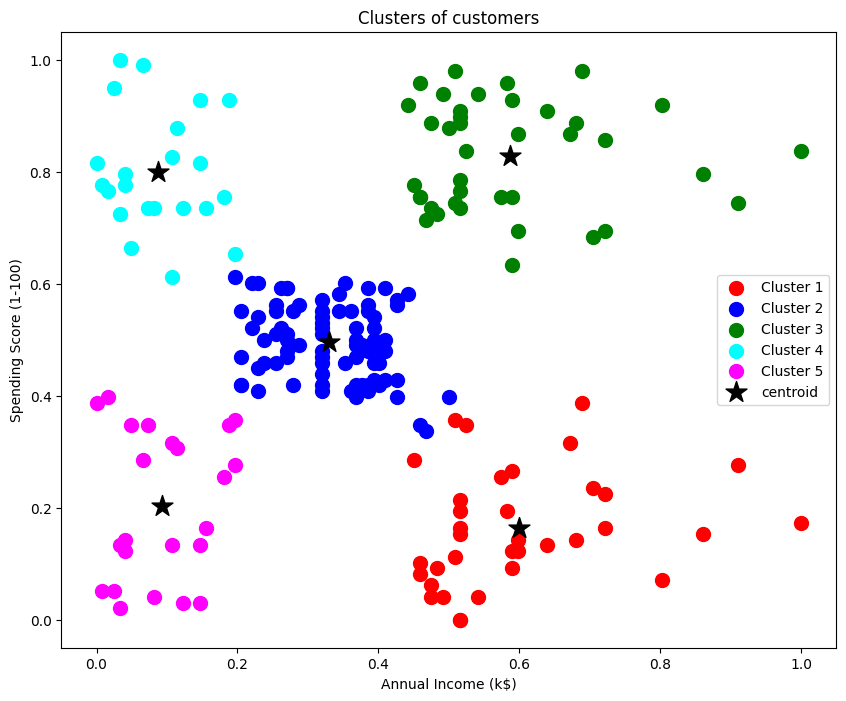

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(dfx1,dfy1, s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dfx2,dfy2, s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(dfx3,dfy3, s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(dfx4,dfy4, s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(dfx5,dfy5, s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],color="black",marker="*",label="centroid",s=250)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#Model Interpretation
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Color) -> average in terms of earning and spending
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less

#here we can set the target set as Cluster 3 to predict which customers has earn more money and spending high.
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959


In [ ]:
km=KMeans(n_clusters=5)

In [ ]:
y_predicted=km.fit_predict(df[['Age','Spending Score (1-100)']])
df['cluster']=y_predicted
df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,0.019231,0.000000,0.387755,2
1,2,1,0.057692,0.000000,0.816327,1
2,3,0,0.038462,0.008197,0.051020,2
3,4,0,0.096154,0.008197,0.775510,1
4,5,0,0.250000,0.016393,0.397959,2
5,6,0,0.076923,0.016393,0.765306,1
6,7,0,0.326923,0.024590,0.051020,0
7,8,0,0.096154,0.024590,0.948980,1
8,9,1,0.884615,0.032787,0.020408,0
9,10,0,0.230769,0.032787,0.724490,1


In [ ]:
km.cluster_centers_

array([[0.52767355, 0.1483325 ],
       [0.23347356, 0.80771684],
       [0.11791498, 0.41675618],
       [0.9029304 , 0.48104956],
       [0.56036325, 0.46371882]])

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

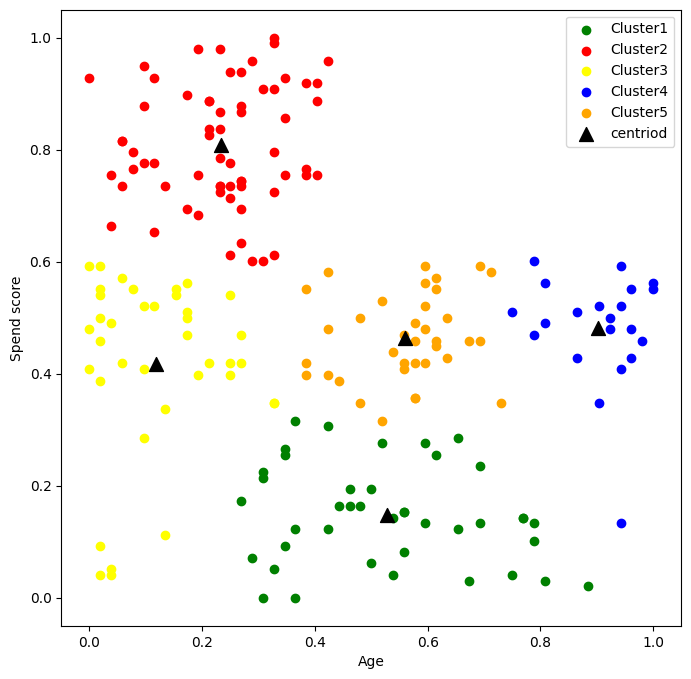

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],label='Cluster1',color='green')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],label='Cluster2',color='red')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],label='Cluster3',color='yellow')
plt.scatter(df4['Age'],df4['Spending Score (1-100)'],label='Cluster4',color='blue')
plt.scatter(df5['Age'],df5['Spending Score (1-100)'],label='Cluster5',color='orange')
plt.xlabel('Age')
plt.ylabel('Spend score')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='^',
            label='centriod',s=100)
plt.legend()
plt.show()

In [ ]:
#Model Interpretation
#Cluster 1 (Green Color) -> maximum in terms of age and also spending average
#cluster 2 (Red Color) -> minimum in terms of age but spending high [Target Set]
#cluster 3 (yellow Color) -> average in terms of age and also spending average
#cluster 4 (Blue Color) -> minimum in terms of age and spending less
#Cluster 5 (Orange Color) -> average age and spending less

#here we can set the target set as Cluster 2 to predict which age group is spending high